In [1]:
# start a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ALS100").config("spark.driver.memory", "16g").getOrCreate()

24/04/28 16:41:02 WARN Utils: Your hostname, ZOU.local resolves to a loopback address: 127.0.0.1; using 100.72.44.48 instead (on interface en0)
24/04/28 16:41:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/28 16:41:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/28 16:41:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
# set the log level to ERROR
spark.sparkContext.setLogLevel("ERROR")

In [3]:
import pandas as pd
best_predictions_ca_pd = pd.read_parquet("/Users/ZOU/best_predictions_ca_10.parquet")

In [4]:
# show the first 5 rows
best_predictions_ca_pd.head()

,business,user,rating,avg_rating,num_of_reviews,business_id,user_id,__index_level_0__,rating_binary,prediction,prediction_binary,probability
0,0x4cb41c74dc86650f:0xb342101f4f9ff626,110055942235947905393,5.0,4.164179,67,496,1858836,4052680,1,0.000000,0,0.293902
1,0x4cb41c74dc86650f:0xb342101f4f9ff626,102006791452405498507,4.0,4.164179,67,496,370422,4052699,0,0.000000,0,0.293902
2,0x4cb41c74dc86650f:0xb342101f4f9ff626,112012784291009953891,4.0,4.164179,67,496,2220093,4052657,0,0.000000,0,0.293902
3,0x4cb41c74dc86650f:0xb342101f4f9ff626,101090459125227306688,5.0,4.164179,67,496,201320,4052698,1,0.644056,1,0.729427
4,0x54ce74d3944d003d:0x183b05cdb3bdc29e,101113479209736068471,5.0,4.750000,4,1591,205520,1726679,1,0.013046,1,0.302724


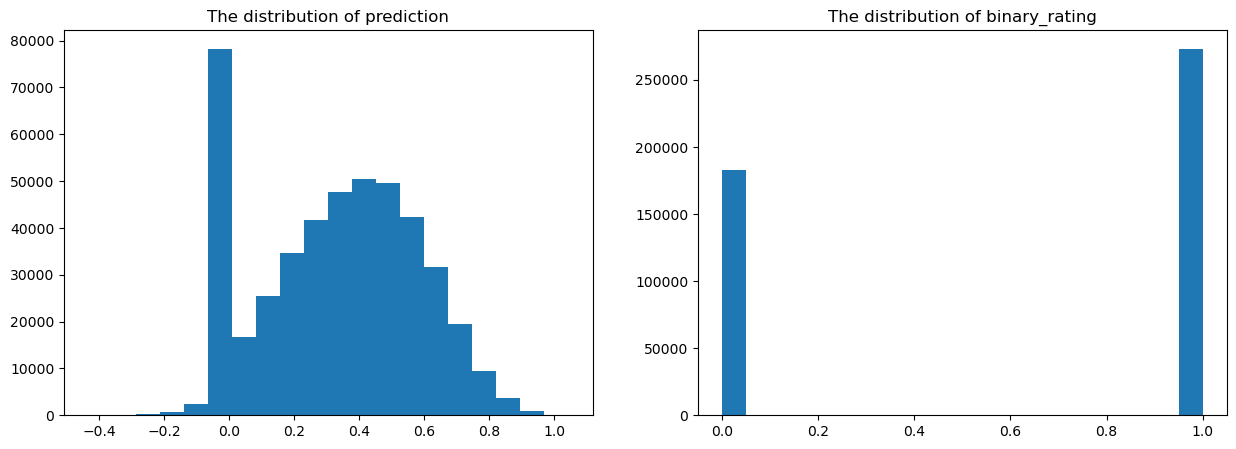

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# draw the ditrbution of prediction column
axs[0].hist(best_predictions_ca_pd["prediction"], bins=20)
axs[0].set_title("The distribution of prediction")

# draw the ditrbution of rating column
axs[1].hist(best_predictions_ca_pd["rating_binary"], bins=20)
axs[1].set_title("The distribution of binary_rating")

plt.show()

In [6]:
# draw the precision-recall curve and ROC curve
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(best_predictions_ca_pd["rating_binary"], best_predictions_ca_pd["probability"])
auc_score_pr = auc(recall, precision)

# calculate the roc curve
fpr, tpr, _ = roc_curve(best_predictions_ca_pd["rating_binary"], best_predictions_ca_pd["probability"])

# calculate the auc
auc_score = auc(fpr, tpr)

print(auc_score_pr)
print(auc_score)

0.7767705550423013
0.6994721676892514


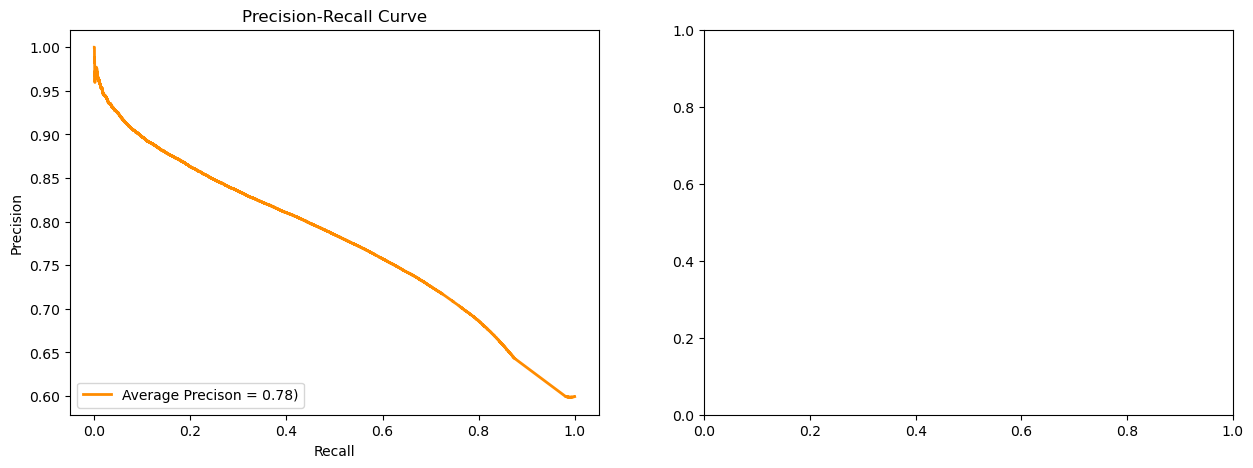

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# draw the precision-recall curve
axs[0].plot(recall, precision, color='darkorange', lw=2, label=f'Average Precison = {auc_score_pr:.2f})')
axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].set_title("Precision-Recall Curve")
axs[0].legend(loc="lower left")

# draw the roc curve
# axs[1].plot(fpr, tpr, label="AUC = {:.2f}".format(auc_score))
# axs[1].set_xlabel("False Positive Rate")
# axs[1].set_ylabel("True Positive Rate")
# axs[1].set_title("ROC Curve")
# axs[1].legend()

plt.show()

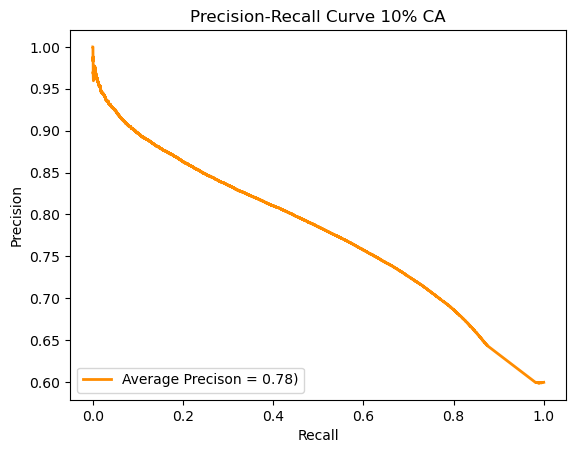

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# draw the precision-recall curve
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Average Precison = {auc_score_pr:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve 10% CA")
plt.legend(loc="lower left")
plt.show()